In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
r_min = 2**(1/6)*2**(-1/6)
A = 1.2
r_cut = r_min*A
colors = ['blue','red','green','black','orange','purple','yellow']
from sklearn.decomposition import PCA as skPCA


In [2]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [3]:
class PCA: # Principal Component Analysis
    def __init__(self, n_components):
        self.k = n_components
    
    def fit(self, X):
        M, p = X.shape
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        C = 1/(M-1) * X_centered.T @ X_centered

        lambdas, Q = np.linalg.eig(C)
        eigenvalue_order = np.argsort(lambdas)[::-1]
        lambdas = lambdas[eigenvalue_order]
        Q = Q[:,eigenvalue_order]
        self.Qk = Q[:,:self.k]
    
    def transform(self, X):
        X_centered = X - self.mean
        return X_centered @ self.Qk

In [86]:
class CoulombMatrixSpectrum():
    
    def __init__(self, color='C4'):
        self.xwidth = 1
        self.color = color
    
    def descriptor(self,pos):
        connectivity_matrix = np.zeros((len(pos),len(pos)))
        distances = squareform(pdist(pos))
        for i in range(len(distances)):
            for j in range(len(distances[i])):
                if i != j:
                    connectivity_matrix[i][j] = 1/distances[i][j]
                if distances[i][j] < r_cut:
                    connectivity_matrix[i][j] = 1
                
        connectivity_matrix = np.array(connectivity_matrix)
        eigenvalues = np.real(np.linalg.eigvals(connectivity_matrix))
        return np.sort(eigenvalues) 

        
    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([-2,8])
        ax.set_title(self.__class__.__name__)

    def _V(self,r):
        return 4*5*((2**(-1/6)/r)**12 - (2**(-1/6)/r)**6)


    def energy(self, pos):
        return np.sum(self._V(pdist(pos)))

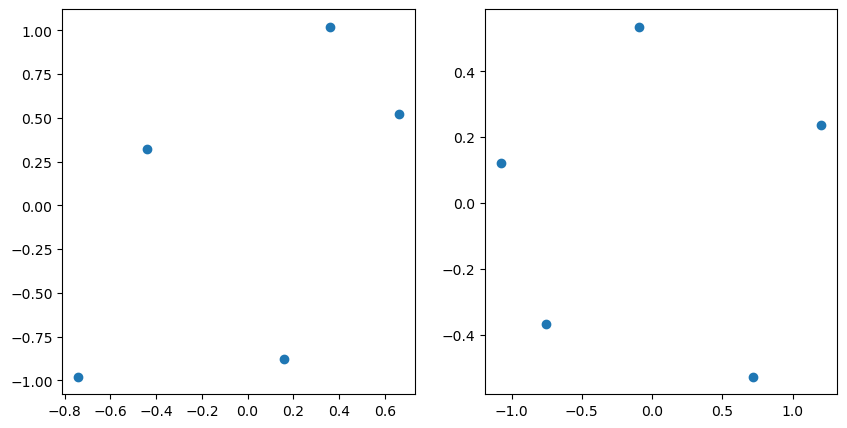

In [5]:
data = np.array([[2.5, 2.4],
          [2.0, 1.0],
          [2.2, 2.9],
          [1.4, 2.2],
          [1.1, 0.9]])  
pca = PCA(n_components=2)
pca.fit(data)
pca_data = pca.transform(data)

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter((data-np.mean(data, axis=0))[:,0],(data-np.mean(data, axis=0))[:,1])

ax[1].scatter(*pca_data.T)


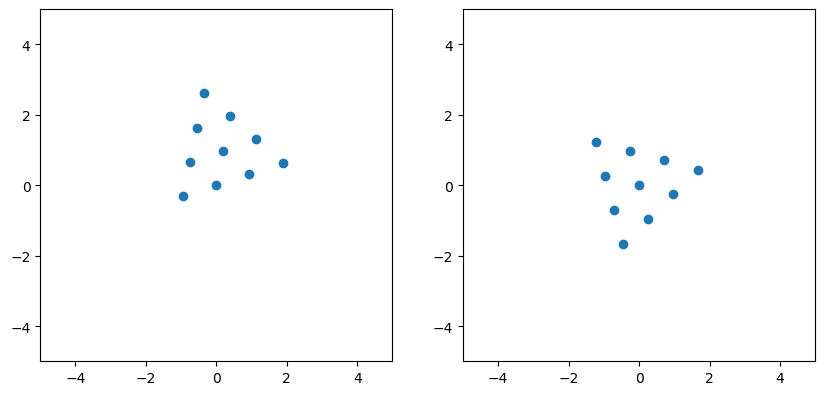

In [6]:
pca_datas = []

for i in range (len(positions)):
    pca = PCA(n_components=3)
    pca.fit(positions[i])
    pca_data = pca.transform(positions[i])
    pca_datas.append(pca_data)

sklearn_pcas = skPCA(n_components=2)
sklearn_pcas.fit(pos_flat)

pca = PCA(n_components=2)
pca.fit(positions[5])
pca_data = pca.transform(positions[5])


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(*positions[5].T)
ax[1].scatter(*pca_data.T)

for i in range (2):
    ax[i].set_aspect('equal')
    ax[i].set_xlim(-5,5)
    ax[i].set_ylim(-5,5)


In [7]:
pca_datas[0]

array([[ 0.34107687,  0.16980063],
       [-1.27593333, -0.98470754],
       [-1.39313337,  0.01228199],
       [-0.48756026, -0.3839682 ],
       [-0.56842504,  0.59932199],
       [ 0.36694251, -0.85469101],
       [ 1.20605125, -0.34231922],
       [ 2.07637587,  0.13275813],
       [ 1.21660839,  0.65019354],
       [-1.4820029 ,  1.00132968]])

In [8]:
asd = CoulombMatrixSpectrum()
descrip = [asd.descriptor(pos = position) for position in positions]

In [9]:
descrip = np.array(descrip)
descrip

array([[-3.58072313e-01, -3.29787657e-01, -2.04379368e-01,
        -1.65501886e-01, -2.48431914e-03,  2.37664249e-01,
         6.25852475e-01,  9.30247379e-01,  2.18532592e+00,
         7.08113552e+00],
       [-4.03138265e-01, -2.40356775e-01, -2.09260991e-01,
        -1.42313585e-01,  1.78008437e-01,  2.39917252e-01,
         4.26199171e-01,  1.05573904e+00,  2.66821189e+00,
         6.42699383e+00],
       [-3.74082446e-01, -3.41423384e-01, -1.98228621e-01,
        -1.69291132e-01,  1.48689298e-02,  9.42684647e-02,
         6.49743031e-01,  9.65129653e-01,  2.09834785e+00,
         7.26066765e+00],
       [-3.74205249e-01, -3.41303562e-01, -1.98038864e-01,
        -1.69354635e-01,  1.49034956e-02,  9.42542992e-02,
         6.49865854e-01,  9.64747337e-01,  2.09852488e+00,
         7.26060645e+00],
       [-3.47944928e-01, -3.21181241e-01, -2.34515899e-01,
        -1.74729246e-01,  1.11460981e-01,  2.50498692e-01,
         6.57352122e-01,  1.07412323e+00,  1.99606914e+00,
         6.

In [10]:
pca = PCA(n_components=2)

In [11]:

pca.fit(descrip)
pca_data = pca.transform(descrip)

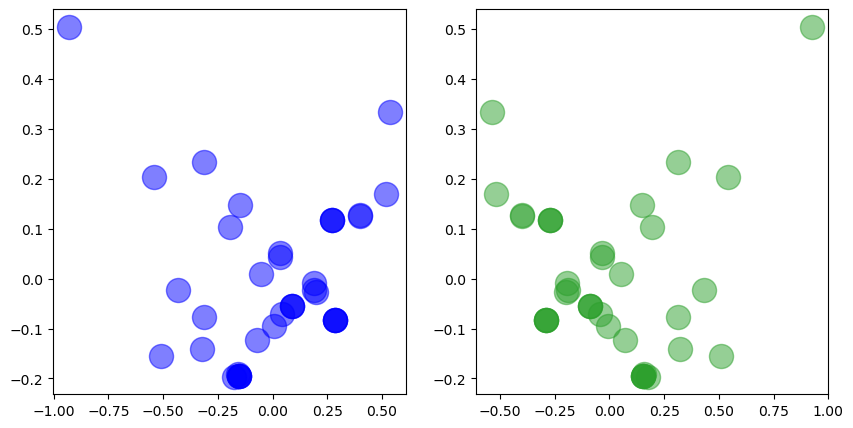

In [12]:
# pca_datas = []

# for i in range (len(positions)):
#     pca = PCA(n_components=1)
#     asd = CoulombMatrixSpectrum()
#     descrip = asd.descriptor(positions[i])
#     pca.fit(descrip)
#     pca_data = pca.transform(descrip)
#     pca_datas.append(pca_data)


fig, ax = plt.subplots(1,2,figsize=(10,5))
# for i in range(len(pca_datas)):
    # ax.scatter(*pca_datas[i][0],color = 'blue', alpha = 0.5, s=100)
ax[0].scatter(pca_data[:,0],pca_data[:,1], color = 'blue', alpha = 0.5, s=300)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
descriptors_transformed_sklearn = sklearn_pca.fit_transform(descrip)
ax = ax[1]
ax.scatter(descriptors_transformed_sklearn[:,0],
           descriptors_transformed_sklearn[:,1],s=300,alpha=0.5,color='C2')



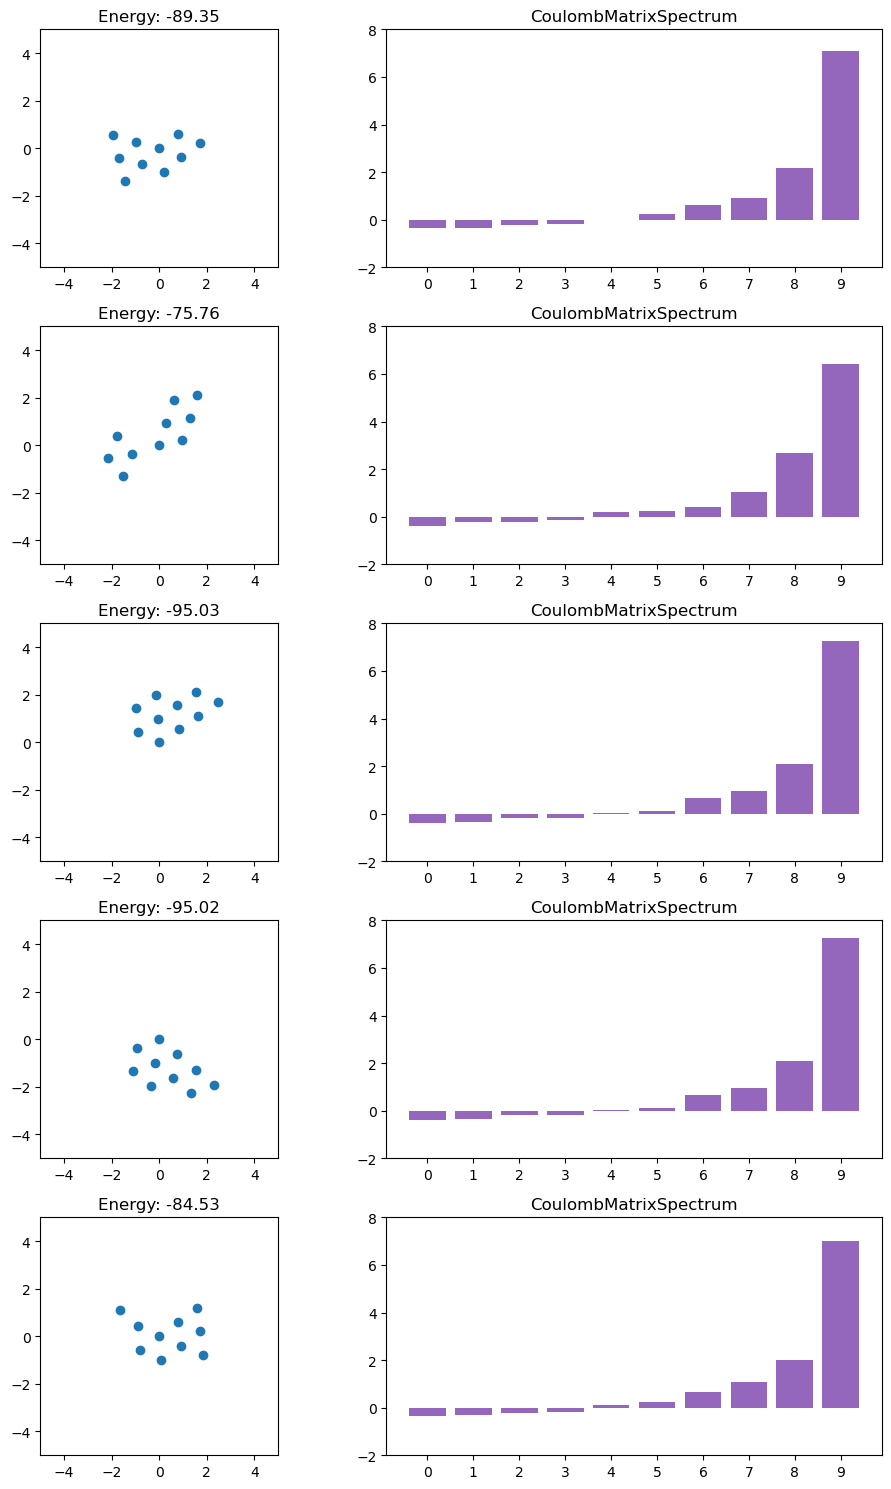

In [ ]:
#only share x axis for columns
plot_clusters = [0,1,2,3,4]

fig, ax = plt.subplots(len(plot_clusters),2, figsize=(10,15))#, sharex='col')

for i in plot_clusters:
    ax[i][0].scatter(*positions[i].T)
    ax[i][0].set_xlim(-5,5)
    ax[i][0].set_ylim(-5,5)
    asd = CoulombMatrixSpectrum()
    asd.descriptor(positions[i])
    asd.draw(positions[i],ax[i][1])
    # ax[i][0].set_title('E: {:.2f}'.format(asd.descriptors[0].energy(positions[i])))
    ax[i][0].set_aspect('equal')

plt.tight_layout()

In [82]:
all_rattled_positions[2]

array([[-0.04218949, -0.02398714],
       [-1.49056663, -1.49610694],
       [-1.64728545, -0.44239322],
       [-0.76209046, -0.66498818],
       [-0.90251263,  0.19726092],
       [ 0.2431305 , -0.90407517],
       [ 0.91176978, -0.37313966],
       [ 1.66614976,  0.23366614],
       [ 0.695763  ,  0.72630789],
       [-1.90569349,  0.46004077]])

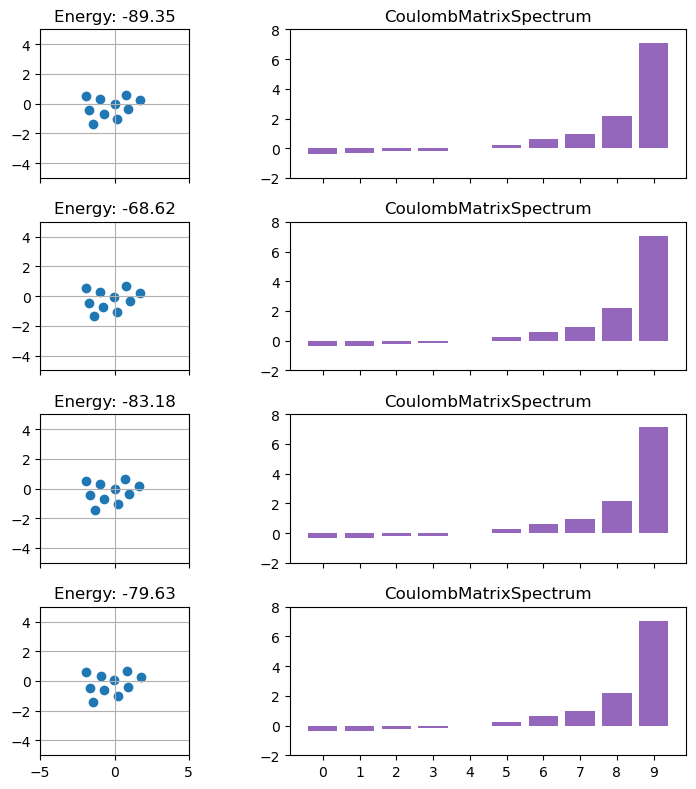

In [98]:
rattle_cluster = positions[0]
rattled_positions = [positions[0] + np.random.normal(0, 0.05, positions[0].shape) for _ in range(3)]
all_rattled_positions = [rattle_cluster,*rattled_positions]

# Creating subplots
fig, ax = plt.subplots(len(all_rattled_positions), 2, figsize=(8, 8), sharex='col')

# Iterate through rattled positions and plot
for i in range(len(all_rattled_positions)):
    ax[i, 0].scatter(*all_rattled_positions[i].T)
    ax[i, 0].set_xlim(-5, 5)
    ax[i, 0].set_ylim(-5, 5)
    ax[i, 0].set_aspect('equal')
    ax[i, 0].grid()
    ax[i, 0].set_title('Energy: {:.2f}'.format(asd.energy(all_rattled_positions[i])))

    # Descriptor
    asd = CoulombMatrixSpectrum()  # Ensure this class is defined
    asd.descriptor(all_rattled_positions[i])
    asd.draw(all_rattled_positions[i], ax[i, 1])

plt.tight_layout()
plt.show()

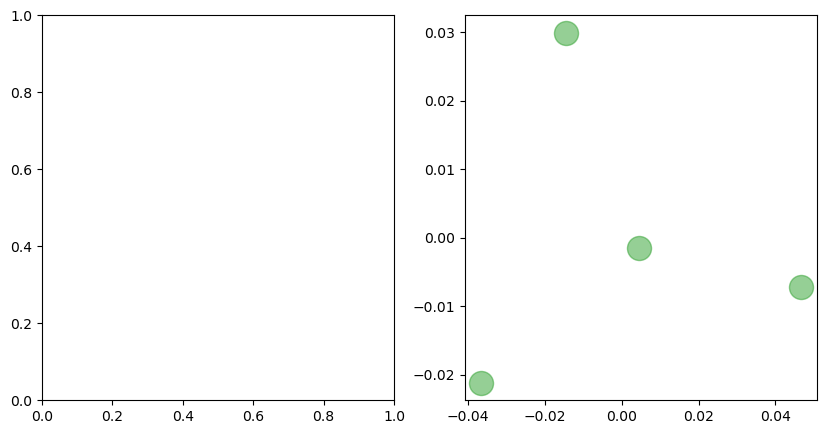

In [116]:
fix, ax = plt.subplots(1,2,figsize=(10,5))
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
descriptors_transformed_sklearn = sklearn_pca.fit_transform(rattled_descriptor)
ax = ax[1]
ax.scatter(descriptors_transformed_sklearn[:,0],
           descriptors_transformed_sklearn[:,1],s=300,alpha=0.5,color='C2')

In [113]:
rattled_descriptor[2]

array([-3.46915196e-01, -3.34182423e-01, -2.09982512e-01, -1.65811509e-01,
       -2.27524730e-03,  2.43080231e-01,  6.04319932e-01,  9.41302624e-01,
        2.16006958e+00,  7.11039452e+00])

In [108]:
descrip[0]

array([-3.58072313e-01, -3.29787657e-01, -2.04379368e-01, -1.65501886e-01,
       -2.48431914e-03,  2.37664249e-01,  6.25852475e-01,  9.30247379e-01,
        2.18532592e+00,  7.08113552e+00])

In [117]:
# rattled_descriptor = [asd.descriptor(all_rattled_positions[i]) for i in range(len(all_rattled_positions))]
# rattled_descriptor_pca = [sklearn_pca.transform(descriptor) for descriptor in rattled_descriptor]
# rattled_descriptor_pca_2 = [sklearn_pca.fit_transform(descriptor) for descriptor in rattled_descriptor]


# for i in range(len(all_rattled_positions)):
#     ax[i, 0].scatter(*all_rattled_positions[i].T)
#     ax[i, 0].set_xlim(-5, 5)
#     ax[i, 0].set_ylim(-5, 5)
#     ax[i, 0].set_aspect('equal')
#     ax[i, 0].grid()
#     ax[i, 0].set_title('Energy: {:.2f}'.format(asd.energy(all_rattled_positions[i])))

#     # Descriptor
#     ax[i,1].scatter(*rattled_descriptor_pca[i].T)
    

# plt.tight_layout()
# plt.show()


In [119]:
rattled_descriptor

[array([-3.58072313e-01, -3.29787657e-01, -2.04379368e-01, -1.65501886e-01,
        -2.48431914e-03,  2.37664249e-01,  6.25852475e-01,  9.30247379e-01,
         2.18532592e+00,  7.08113552e+00]),
 array([-3.40547411e-01, -3.30280230e-01, -2.14247528e-01, -1.66457062e-01,
         5.75940314e-03,  2.29984660e-01,  6.13462827e-01,  9.34555605e-01,
         2.15265636e+00,  7.11511337e+00]),
 array([-0.35241865, -0.32850418, -0.21449648, -0.16219824, -0.00799542,
         0.23676426,  0.64205331,  0.91123785,  2.18790156,  7.08765599]),
 array([-3.55498437e-01, -3.31100705e-01, -2.29385434e-01, -1.78422255e-01,
         9.11191582e-04,  2.46340357e-01,  6.55797552e-01,  9.62910870e-01,
         2.16471524e+00,  7.06373162e+00]),
 array([-0.37262017, -0.31110599, -0.19508243, -0.13485732, -0.02452389,
         0.22310039,  0.62686366,  0.87639614,  2.22056347,  7.09126614]),
 array([-3.59628069e-01, -3.15512926e-01, -2.15433778e-01, -1.66008595e-01,
        -6.13721949e-03,  2.26560997e-01

0
1
2
3


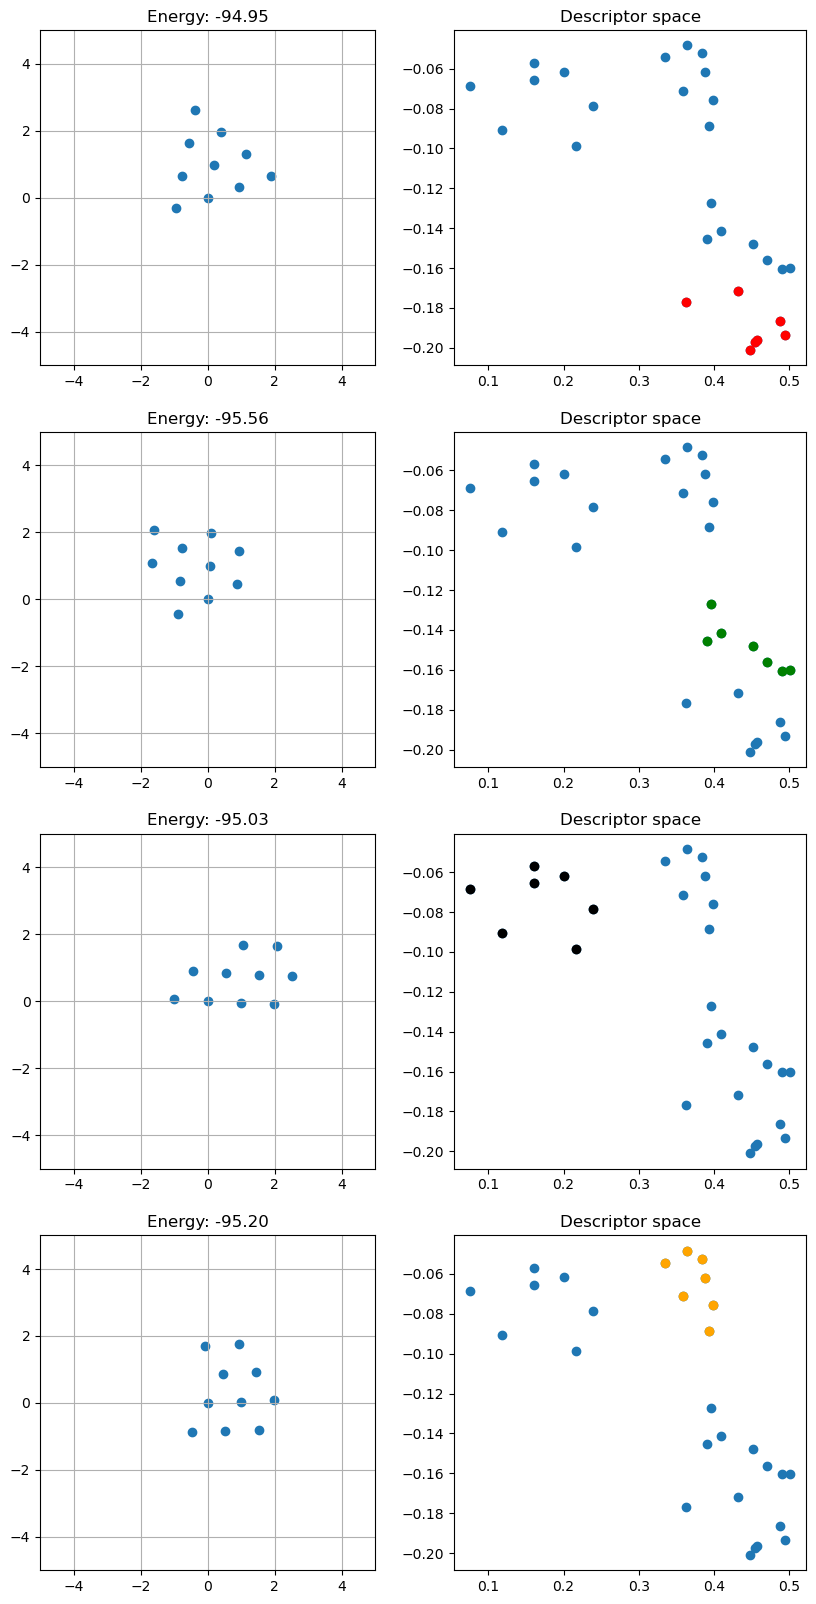

: 

In [185]:
fig, ax = plt.subplots(4,2, figsize=(10,20))
for j in range (4):
    print(j)
    rattle_cluster = positions[j+5]
    rattled_positions = [rattle_cluster + np.random.normal(0, 0.05, positions[j].shape) for _ in range(6)]
    all_rattled_positions = [rattle_cluster,*rattled_positions]
    rattled_descriptor = [asd.descriptor(all_rattled_positions[a]) for a in range(len(all_rattled_positions))]
    rattled_descriptor_pca = sklearn_pca.transform(rattled_descriptor)
    ax[j, 0].scatter(*rattle_cluster.T)
    ax[j, 0].set_xlim(-5, 5)
    ax[j, 0].set_ylim(-5, 5)
    ax[j, 0].set_aspect('equal')
    ax[j, 0].grid()
    ax[j, 0].set_title('Energy: {:.2f}'.format(asd.energy(rattle_cluster)))
    for i in range (4):
        ax[i,1].scatter(*rattled_descriptor_pca.T, color='tab:blue')
    ax[j,1].scatter(*rattled_descriptor_pca.T, color=colors[j+1],zorder=10)
    ax[j,1].set_title('Descriptor space')



